In [1]:
import pandas as pd
import numpy as np
import MarineDNA as md
import seaborn as sn

In [2]:
file1 = "../../../Data/Flyer2018_16S_table_counts.tsv"
asvs1 = pd.read_csv(file1, index_col=0, sep="\t")

In [3]:
asv_PCAs = [md.doPCA(md.ranRelPct(asvs1)) for i in range(10)]

In [4]:
raw_loadings = [x["loadings"] for x in asv_PCAs]

<Axes: >

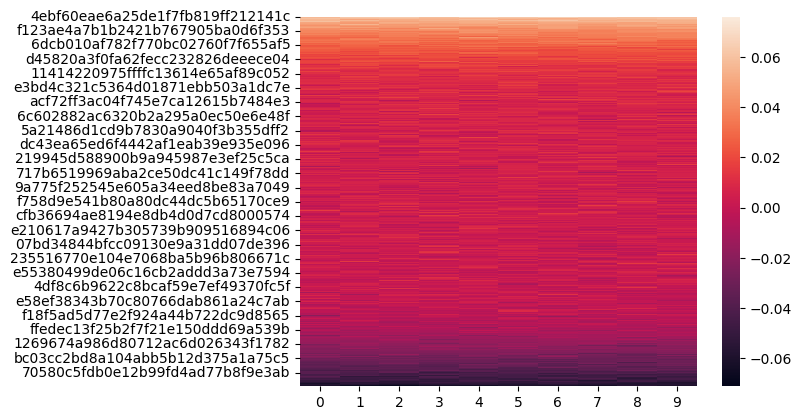

In [5]:
df = md.sortLoadings_std(raw_loadings, 0, asvs1.transpose().columns.values)
sn.heatmap(df)

In [6]:
def iqrThresh(x):
    quarts = np.quantile(x, [0.25, 0.75])
    iqr = np.diff(quarts)
    lower = quarts[0] - 1.5 * iqr
    upper = quarts[1] + 1.5 * iqr
    return [lower, upper]
    
iqrThresh(df.iloc[:,0])

[array([-0.01901414]), array([0.02567043])]

In [11]:
def isOutlier(x):
    thresh = iqrThresh(x)
    return [xi <= thresh[0] or xi >= thresh[1] for xi in x]

type(isOutlier(df.iloc[:,0]))

list

In [9]:
outliers = [isOutlier(df.iloc[:,i]) for i in range(df.shape[1])]
np.array(outliers)

array([[[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       ...,

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]]])